<a href="https://colab.research.google.com/github/Marcozambeli/Control-Theory-II---UFJF/blob/master/MARCO_ANTONIO_DE_OLIVEIRA_ZAMBELI_PrimTrabControle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiro Trabalho de Teoria de Controle (Turma B) 

$Prof. André Marcato$

A prova deve ser resolvida no próprio Google Colab.

Tirar uma foto ou digitalizar as questões que necessitarem desenvolvimento manual e as insira no próprio google colab através de um bloco de texto.
 
Deixar a prova organizada, ou seja, inserir os blocos de texto ou código após o enunciado das questões.


## Questão 1 

Considere o sistema cuja funçãão de transferêência de malha fechada é:

$ \frac{C(s)}{R(s)} = \frac{10(s+1)}{(s+2)(s+5)}$

Responda o que se pede. *** Valor

a) Faça um programa em um bloco de código em Python para traçar as assíntotas de todos os fatores básicos do $|G(j\omega)|_{db}$.

b) Em um novo bloco de código, some as assíntotas obtidas na letra **a** para obter um gráfico do comportamento assintótico do $|G(j\omega)|_{db}$.

c) Em um novo bloco de código, mostre o gráfico da resposta assintótica e o gráfico da curva exata do $|G(j\omega)|_{db}$ para avaliar os erros originados pela aproximação assintótica.

d) Em um novo bloco de código, faça um novo gráfico com o ângulo de $|G(j\omega)|$ em graus. Obs: Não são os fatores básicos, mas sim apenas o gráfico total do ângulo de $|G(j\omega)|$ em graus.

e) Mostre que a resposta em frequencia em malha fechada desse sistema apresenta um pico de ressonâância, embora o coeficiente de amortecimento dos pólos de malha fechada seja maior que a unidade.

f) Aplicando-se uma entrada $x(t) = 15*sen(0.2t-10^o)$ no sistema em malha fechada qual será a saída $y_{ss}(t)$?

g) Aplicando-se uma entrada $x(t) = 15*sen(3t+30^o)$ no sistema em malha fechada qual será a saída $y_{ss}(t)$?

h) Aplicando-se uma entrada $x(t) = 100*sen(3 \cdot 10^5t+90^o)$ no sistema em malha fechada qual será a saída $y_{ss}(t)$?

**preparação do exercício**

1.   fator basico ganho 10 no numerador;
2.   fator de 1ª ordem no numerador (s+1);
3.   fator de 1ª ordem no denominador (s+2);
4.   fator de 1ª ordem no denominador (s+5);
5.   Polos de malha fechada (-2 e -5), zero (-1).
*   qsi = 1,107, sistema superamortecido (na análise inicial).

-Descrever os fatores básicos na forma padrão:
1.   ok;
2.   ok;
3.   $(s+2)$ = $(1/2)\over((s/2)+1)$ ok;
4.   $(s+5)$ = $(1/5)\over((s/5)+1)$ ok.

-Multiplicar os fatores basicos na forma padrão:
$G(s)$ = $(s+1)\over((s/2)+1)((s/5)+1)$

-Função de Transferência Senoidal:
$G(jw)$ = $(1+jw)\over(1+(jw/2))(1+jw/5))$

-Frequências de canto (rad/s):
$a=1,b=2, c=5$.







**a) Faça um programa em um bloco de código em Python para traçar as assíntotas de todos os fatores básicos do  |𝐺(𝑗𝜔)|𝑑𝑏 .**

In [ ]:
!pip install control

In [23]:
import numpy as np
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from control import *

# Frequências de canto:

A = 1
B = 2
C = 5

# Cria o gráfico
figura = make_subplots(specs=[[{"secondary_y": True}]])

#Cria o vetor de frequencias
w = np.logspace(-0.5,2,1000)

# Fator "a" Primeira Ordem no numerador
w_baixo = w[np.where(w <= 1)]
w_alto = w[np.where(w > 1)]
gjw_baixo = np.zeros(len(w_baixo), dtype=float)
gjw_alto = 20*np.log10(w_alto)
gjwa = np.concatenate((gjw_baixo, gjw_alto))

figura.add_trace(go.Scatter(y=gjwa,x=w,name="Fat. A Prim. Ordem Numerador"),secondary_y=False)

# Fator "b" Primeira Ordem no numerador
w_baixo = w[np.where(w <= 2)]
w_alto = w[np.where(w > 2)]
gjw_baixo = np.zeros(len(w_baixo), dtype=float)
gjw_alto = -20*np.log10(w_alto*(1/2))
gjwb = np.concatenate((gjw_baixo, gjw_alto))

figura.add_trace(go.Scatter(y=gjwb,x=w,name="Fat. B Prim. Ordem Denominador"),secondary_y=False)

# Fator "c" Primeira Ordem no numerador
w_baixo = w[np.where(w <= 3)]
w_alto = w[np.where(w > 3)]
gjw_baixo = np.zeros(len(w_baixo), dtype=float)
gjw_alto = -20*np.log10(w_alto*(1/3))
gjwc = np.concatenate((gjw_baixo, gjw_alto))

figura.add_trace(go.Scatter(y=gjwc,x=w,name="Fat. C Prim. Ordem Denominador"),secondary_y=False)

# Ganho constante
gjwg = 20*np.log10(1)*np.ones(len(w), dtype=float)

figura.add_trace(go.Scatter(y=gjwg,x=w,name="Ganho"),secondary_y=False)

# Descomentar para exibir Curva assintotica total plotada juntamente com as assintotas
#gjw_fina = gjwa + gjwb +gjwc + gjwg
#figura.add_trace(go.Scatter(y=gjw_fina,x=w,name="Aprox.Assint"),secondary_y=False)

#caracteristicas do plot
figura.update_xaxes(type="log")
figura.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Módulo de $G(j \omega)$ em dB"
)



**b)Em um novo bloco de código, some as assíntotas obtidas na letra **a
** para obter um gráfico do comportamento assintótico do $|G(j\omega)|_{db}$.**

In [24]:
# Curva assintotica total
figura2 = make_subplots(specs=[[{"secondary_y": True}]])
gjw_final = gjwa + gjwb +gjwc + gjwg
figura2.add_trace(go.Scatter(y=gjw_final,x=w,name="Aprox.Assint"),secondary_y=False)

#caracteristicas do plot
figura2.update_xaxes(type="log")
figura2.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Módulo de $G(j \omega)$ em dB"
)



**c) Em um novo bloco de código, mostre o gráfico da resposta assintótica e o gráfico da curva exata do  |𝐺(𝑗𝜔)|𝑑𝑏  para avaliar os erros originados pela aproximação assintótica.**



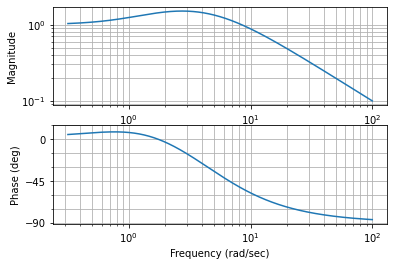

In [68]:
# Curva Exata
figura3 = make_subplots(specs=[[{"secondary_y": True}]])

num = [10, 10]
den = [ 1, 7, 10]
gs = tf(num,den)
diag_bode = bode(gs,w)
gjw_real = diag_bode[0]
gjw_real = 20*np.log10(gjw_real)

figura3.add_trace(go.Scatter(y=gjw_real,x=w,name="Exata"),secondary_y=False)
figura3.add_trace(go.Scatter(y=gjw_final,x=w,name="Aprox.Assint"),secondary_y=False)

#caracteristicas do plot
figura3.update_xaxes(type="log")
figura3.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Módulo de $G(j \omega)$ em dB"
)




**d) Em um novo bloco de código, faça um novo gráfico com o ângulo de  |𝐺(𝑗𝜔)|  em graus. Obs: Não são os fatores básicos, mas sim apenas o gráfico total do ângulo de  |𝐺(𝑗𝜔)|  em graus.**


In [88]:
# Representacao do angulo em graus

figura4 = make_subplots(specs=[[{"secondary_y": True}]])

#cria parametros fazendo referencia aos valores de angulo e frequencia armazenados

fase = diag_bode[1]*180/np.pi # 180/pi para transformar de rad para graus
w_novo = diag_bode[2]

#figura4.add_trace(go.Scatter(x=w, y=phi, name="Angulo de G(jw)"),secondary_y=False)
figura4.add_trace(go.Scatter(x=w_novo, y=fase, name="Angulo de G(jw)"),secondary_y=False)

#caracteristicas do plot
figura4.update_xaxes(type="log")
figura4.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Angulo G(jw) em graus"
)

**e) Mostre que a resposta em frequencia em malha fechada desse sistema apresenta um pico de ressonância, embora o coeficiente de amortecimento dos pólos de malha fechada seja maior que a unidade.**


Da análise do primeiro gráfico, pode-se observar as assíntotas de cada um dos fatores básicos que compõem a função G(s). Como a resposta final consiste no somatório de cada uma dessas assíntotas, constata-se a influência do fator básico de primeira ordem no numerador (s+1) que contribui com uma inclinação positiva de 20 dB/decada, criando um pico de ressonância (mesmo com qsi=1,107).

**f) Aplicando-se uma entrada $x(t) = 15*sen(0.2t-10^o)$ no sistema em malha fechada qual será a saída $y_{ss}(t)$?**


In [ ]:
!apt install octave

In [ ]:
%%writefile add.m 


In [ ]:
# -W : no window system
!octave -W add.m

**g) Aplicando-se uma entrada $x(t) = 15*sen(3t+30^o)$ no sistema em malha fechada qual será a saída $y_{ss}(t)$?**

**h) Aplicando-se uma entrada $x(t) = 100*sen(3 \cdot 10^5t+90^o)$ no sistema em malha fechada qual será a saída $y_{ss}(t)$?**

## Questão 2

Define-se freqüência de cruzamento de ganho, aquela frequência na qual o gráfico do $|G(j \omega)|_{db}$ cruza o eixo das freqüêências.

Desenvolver um programa em Python para determinar a freqüência de cruzamento de ganho do sistema em falha fechada cuja função de transferência foi especificada no enunciado da ***Questão 1***.
